In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hydranerv.models.network.neuron import Neuron
from hydranerv.models.network.network import Network

In [3]:
def adjust_train(train, vmin, vrescale, offset):
    return [(x - vmin) / vrescale + offset for x in train]

In [4]:
N = 50
AMP_SIZE = 10
GC = 20
DENSITY = .3
TMAX = 1000
T_REF = .1
WNOISE = 5000

In [5]:
def simulate(num_pacemakers):
    
    P = num_pacemakers
    
    # define edges
    edges = []
    np.random.seed(1)
    for i in range(N):
        for j in range(i+1, N):
            if np.random.rand() < DENSITY and (i, j) not in edges:
                edges.append((i, j))
    
    # add amplifier
    for i in range(0, AMP_SIZE):
        for j in range(i + 1, AMP_SIZE):
            if (i, j) not in edges:
                edges.append((i, j))

    # initiate network
    ntwk = Network(num=N, edges=edges, gc=GC, tmax=TMAX, pacemakers=range(P), conn_type='gap_junction', wnoise=WNOISE)
    
#     # display connection matrix
#     ntwk.disp_conn_mat()
    
    # run simulation
    ntwk.run()
    
    # display result
    ntwk.disp(figsize=(10, 10), style='spike', dpi=100)
    
    # display single
    plt.figure(figsize=(15,3))
    plt.plot(ntwk.neurons[25].v_train, lw=.5)
    plt.show()

## 10 pacemakers

100%|██████████| 99999/99999 [00:57<00:00, 1739.23it/s]


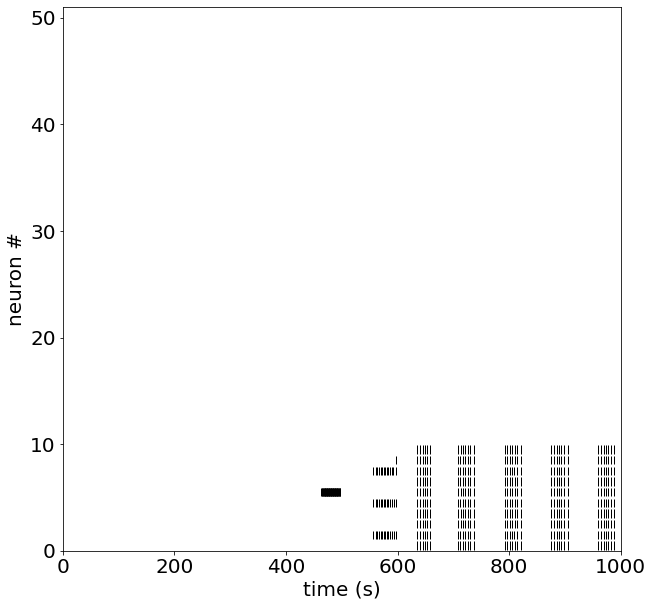

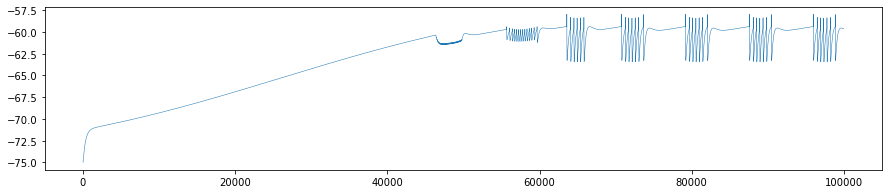

In [6]:
simulate(10)

## 30 pacemakers

100%|██████████| 99999/99999 [01:01<00:00, 1638.11it/s]


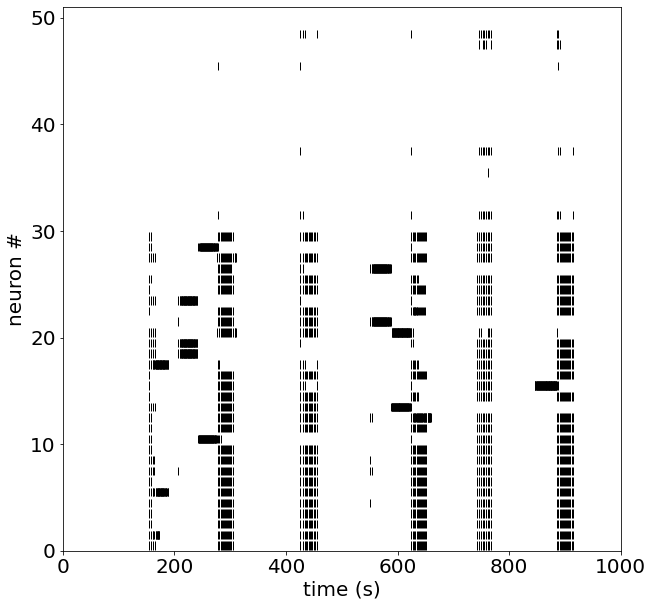

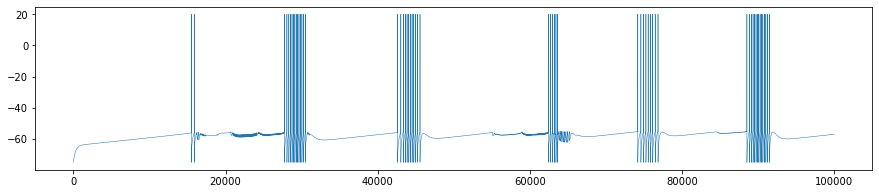

In [7]:
simulate(30)

## 35 pacemakers

100%|██████████| 99999/99999 [01:02<00:00, 1605.30it/s]


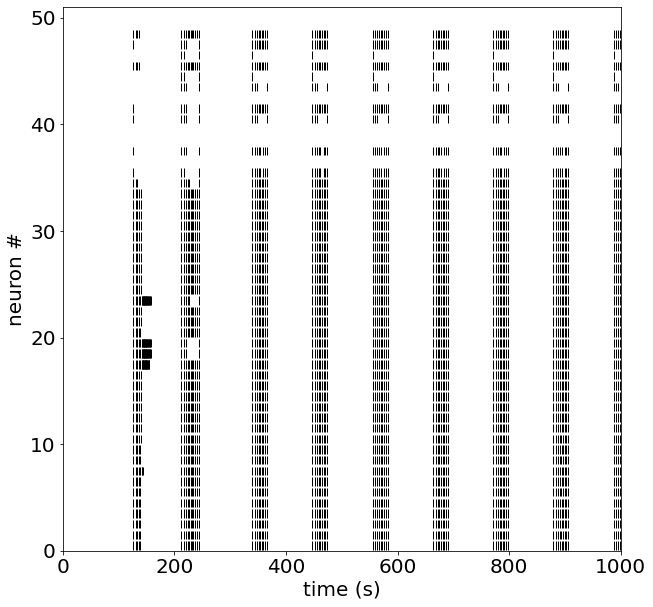

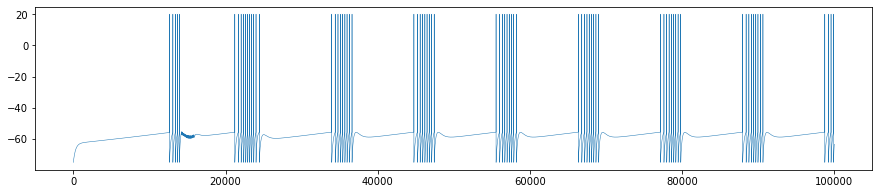

In [8]:
simulate(35)

## 40 pacemakers

100%|██████████| 99999/99999 [01:04<00:00, 1548.30it/s]


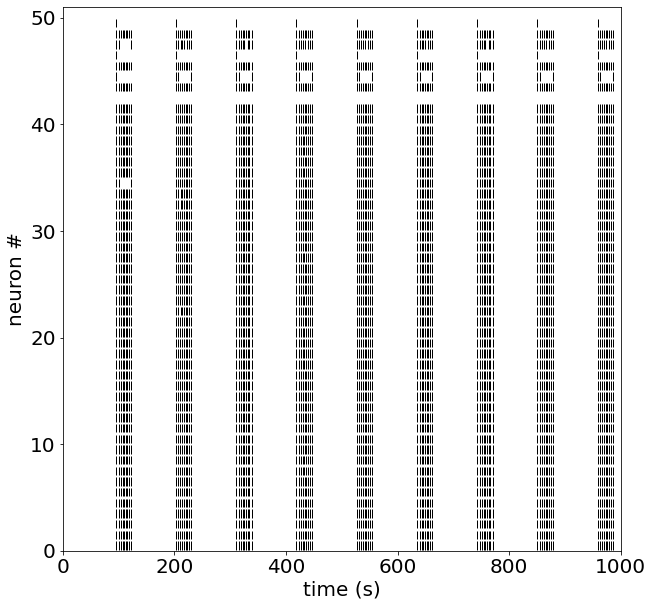

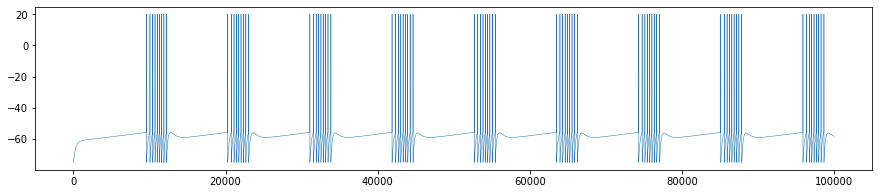

In [9]:
simulate(40)

## 45 pacemakers

100%|██████████| 99999/99999 [01:04<00:00, 1541.71it/s]


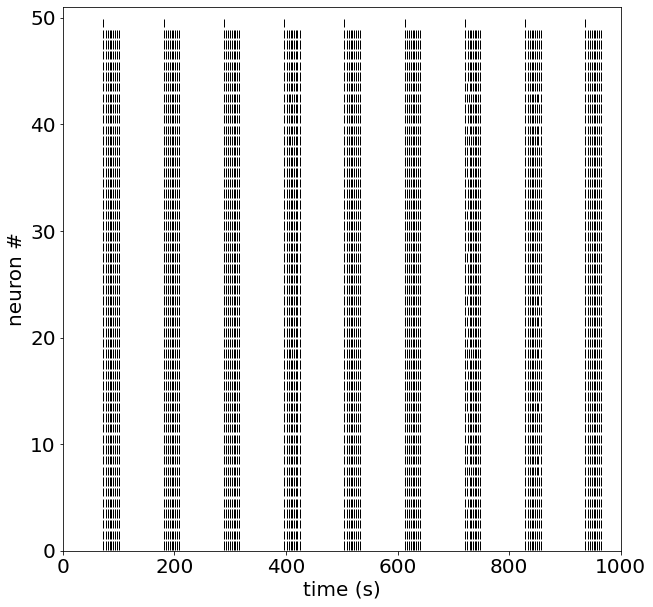

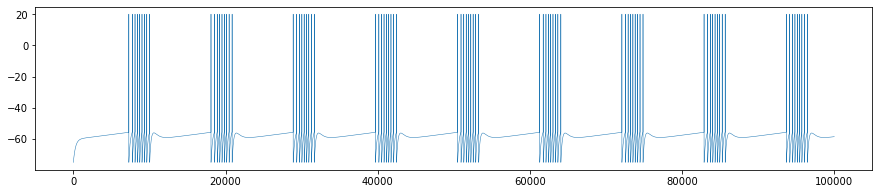

In [10]:
simulate(45)

## 50 pacemakers

100%|██████████| 99999/99999 [01:05<00:00, 1532.89it/s]


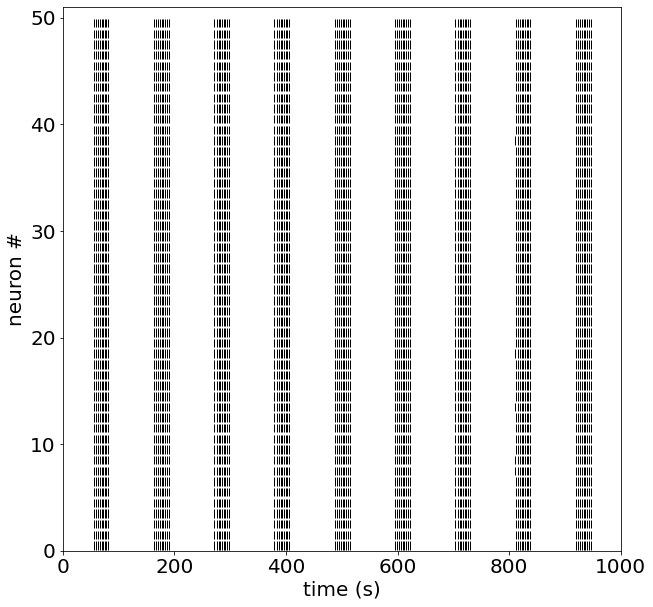

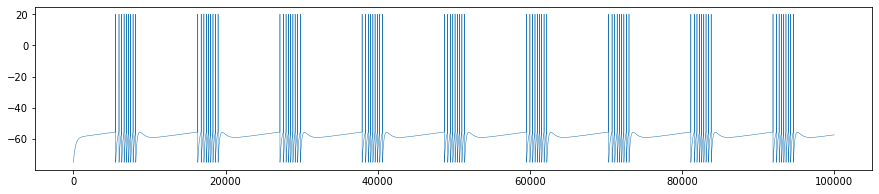

In [11]:
simulate(50)